<a href="https://colab.research.google.com/github/ahaque12/fiddler-hack-gymnastics/blob/main/Fiddler_on_the_Proof_hack_gymnastics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fiddler on the Proof - Hack Gymnastics
https://thefiddler.substack.com/p/can-you-hack-gymnastics

# Classic
In artistic gymnastics, competitors earn two subscores: one for difficulty and one for execution. Difficulty, as its name implies, is a measure of how challenging a routine is. While there’s technically no upper bound on the difficulty score, the toughest routines will earn around 6 or 7 points, depending on the apparatus. Meanwhile, execution scores have a maximum value of 10, essentially measuring how cleanly a competitor performed their routine.

What’s weird (to me at least) about gymnastics scoring is that the total score is difficulty plus execution, rather than difficulty times execution.

Why is that weird? Suppose two gymnasts have the same execution score, (say, 8.0 out of 10), but one’s difficulty is 20 percent greater (say, 6.0 to 5.0). You’d expect that gymnast’s overall score to be 20 percent greater, right? But instead, because we’re adding the two subscores, there’s only a 7.7 percent difference in overall score (14.0 to 13.0).

I guess no one is claiming that the total score should scale linearly with both difficulty and execution. But, you know, it really should.

This past week, Brazil’s Rebeca Andrade won the gold medal for her floor routine while American Simone Biles earned the silver. Andrade's total score was 5.9 + 8.266, or 14.166, and Biles’s was 6.9 + 7.233, or 14.133. (Don’t get me started on the rounding.) But if you had multiplied their subscores (like a rational human being), Biles would instead have come out on top, 49.9 to 48.8.

So yeah, the decision to add versus multiply the subscores really matters.

Suppose gymnast A has a difficulty score of 6.0, while gymnast B has a difficulty score of 5.0. If both gymnasts receive independent, random execution scores between 0 and 10 (quite the range, I know), what is the probability that their relative ranking would be the same, regardless of whether the subscores were added or multiplied? (Here, you should assume the execution scores are real numbers that can go to any number of decimal places.)

# This Week’s Extra Credit
In addition to their execution scores, now assume that both difficulty scores are now also independent, random values between 0 and 10 (again, quite the range).

What is the probability that their relative ranking would be the same, regardless of whether the subscores were added or multiplied? (Again, assume all subscores are real numbers that can go to any number of decimal places.)

In [1]:
import numpy as np
import pandas as pd
from sympy.solvers import solve
from sympy import Symbol, integrate, nsimplify
import matplotlib.pyplot as plt

# Solution

Suppose you have two random variables $x, y \sim U(0,1)$. Then the score under the current scoring mechanism for gymnast A and B respectively are $6 + 10x$ and $5 + 10y$. The score using the multiplication method is $60x$ and $50y$ respectively. The two methods have the same ranking when

\begin{align}
6 + 10x &\leq 5 + 10y \\
60x &\leq 50y \\
\text{or}& \\
6 + 10x &\geq 5 + 10y \\
60x &\geq 50y
\end{align}

You can simplify this to:
\begin{align}
y &\leq x - .1 \\
y &\leq \frac{5}{6}x \\
\text{or}& \\
y &\geq x - .1 \\
y &\geq \frac{5}{6}x \\
\end{align}

### Define scoring functions

In [2]:
A = 5.0
B = 6.0

def score_add(x):
    return x + (A-B)/10

def score_mult(x):
    return x*A/B

x = Symbol('x')

## Find where the two lines intersect

In [3]:
xs = solve(score_add(x) - score_mult(x))[0]
ys = score_add(xs)
xs, ys

(0.600000000000000, 0.500000000000000)

### Plot the different zones.
Each color represents a difference in score ranking

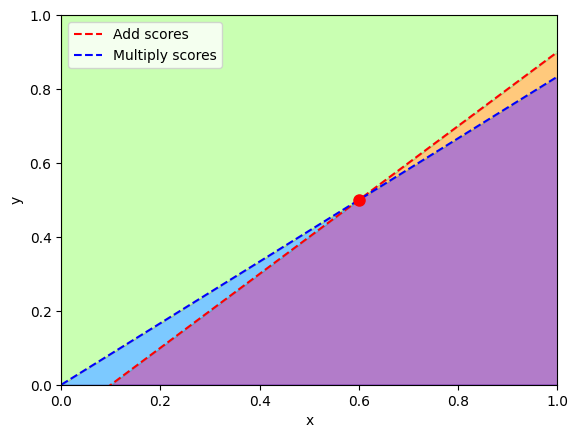

In [4]:
xr = np.linspace(0, 1, 100)
plt.plot(xr, score_add(xr), 'r--', label="Add scores")
plt.plot(xr, score_mult(xr), 'b--', label="Multiply scores")

plt.plot(xs,ys,'ro',markersize=8)

plt.fill_between(xr, score_add(xr), color='red', alpha=.3)
plt.fill_between(xr, score_mult(xr), color='blue', alpha=.3)

plt.fill_between(xr, score_add(xr), 1, color='cyan', alpha=.3)
plt.fill_between(xr, score_mult(xr), 1, color='yellow', alpha=.3)

plt.axis([0, 1, 0, 1])
plt.xlabel("x")
plt.ylabel("y")
plt.legend();

To find the probability you integrate the area over sections 1, 2, and 3 below:

\begin{align}
\int_0^{.1}\frac{5}{6}xdx & \\
&+ \int_{.1}^{.6} (\frac{5}{6}x - (x-.1)) dx \\
&+ \int_{.6}^{1} (-\frac{5}{6}x + (x-.1)) dx
\end{align}

Intersects y=0 at 0.100000000000000
Two lines intersect at 0.600000000000000


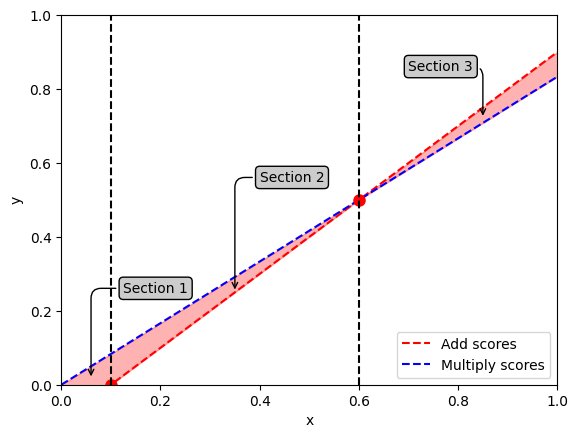

In [5]:
plt.plot(xr, score_add(xr), 'r--', label="Add scores")
plt.plot(xr, score_mult(xr), 'b--', label="Multiply scores")
plt.plot(xs,ys,'ro',markersize=8)
x1 = solve(score_add(x))[0]
y1 = score_add(x1)
print("Intersects y=0 at", x1)
print("Two lines intersect at", xs)
plt.plot(x1, y1,'ro',markersize=8)
plt.fill_between(xr, score_add(xr), score_mult(xr), color='red', alpha=.3)
# Plot vertical line at .1
plt.axvline(x=xs, color='black', linestyle='--')
plt.axvline(x=x1, color='black', linestyle='--')
plt.axis([0, 1, 0, 1])
# Add annotation for section 1 pointing to ~(.25, .05)
bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10")
plt.annotate("Section 1", xy=(.06, .015), xytext=(.125, .25), bbox=bbox, arrowprops=arrowprops)
plt.annotate("Section 2", xy=(.35, .25), xytext=(.4, .55), bbox=bbox, arrowprops=arrowprops)
plt.annotate("Section 3", xy=(.85, .72), xytext=(.7, .85), bbox=bbox, arrowprops=arrowprops)

plt.xlabel("x")
plt.ylabel("y")
plt.legend();

### Integrate to find area of sections 1, 2, and 3

In [6]:
# Integrate score_add from 0 to xs using sympy
p = 1 - (integrate(score_mult(x), (x, 0, x1)) + integrate(-score_add(x) + score_mult(x), (x, x1, xs)) + integrate(score_add(x) - score_mult(x), (x, xs, 1)))
p

0.961666666666667

In [7]:
1 - nsimplify((integrate(score_mult(x), (x, 0, x1)) + integrate(-score_add(x) + score_mult(x), (x, x1, xs)) + integrate(score_add(x) - score_mult(x), (x, xs, 1))))

577/600

### Sanity check using simulation

In [8]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

def print_results(p, std):
  z = 2.576 # 99% confidence interval
  print("Expected probability is " + color.BOLD + color.DARKCYAN + "{:0.4f}%".format(100*p) + color.END +
        " with a 99% confidence interval in " + color.BOLD + color.DARKCYAN + "[{:0.4}%, {:0.4}%]".format(100*(p-z*std), 100*(p+z*std)) + color.END)

print_results(1-0.0383333333333333, .0001)

Expected probability is 96.1667% with a 99% confidence interval in [96.14%, 96.19%]


In [9]:
n = 10000000
x = np.random.random((n, 2))
x = ((5*x[:,0] <= 6*x[:,1]) & (x[:,0] + .5 <= x[:,1] + .6)) | ((5*x[:,0] >= 6*x[:,1]) & (x[:,0] + .5 >= x[:,1] + .6))
p = x.sum()/n
std = np.sqrt(p*p.mean()/n)
print_results(p, std)

Expected probability is 96.1670% with a 99% confidence interval in [96.09%, 96.25%]


## Extra Credit

In [10]:
n = 10000000
x = np.random.random((n, 4))
x = ((x[:,0]*x[:,1] <= x[:,2]*x[:,3]) & (x[:,0] + x[:,1] <= x[:,2] + x[:,3])) | ((x[:,1]*x[:,0] >= x[:,2]*x[:,3]) & (x[:,0] + x[:,1] >= x[:,2] + x[:,3]))
p = x.sum()/n
std = np.sqrt(p*p.mean()/n)
print_results(p, std)

Expected probability is 91.6661% with a 99% confidence interval in [91.59%, 91.74%]
